In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import tensorflow as tf
import keras
import wandb
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import os
import re

wandb.init()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
file_path = 'netrc.txt'  # Change the file path to the desired directory

# Open the file in write mode ('w')
with open(file_path, 'w') as f:
    # Write the content to the file
    f.write('''machine api.wandb.ai
    login user
    password ab6a8ba903047c6f3cfac85df9ae027bab500794
''')

print("File created successfully.")


File created successfully.


In [ ]:
# to get the files in proper order
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image
SIZE = 64

image_path = r'C:\SY\6th\MP\archive\new_photo'
img_array = []

sketch_path = r'C:\SY\6th\MP\archive\new_sketch'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))


for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)

    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # resizing images
    image = cv2.resize(image, (SIZE, SIZE))

    # normalizing image
    image = image.astype('float32') / 255.0

    #appending normal normal image
    img_array.append(img_to_array(image))
    # Image Augmentation

    # horizontal flip
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
     #vertical flip
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
     #vertical flip
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3))
    # rotate clockwise
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    # flip rotated image
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5))
     # rotate anti clockwise
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    # flip rotated image
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))


for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)

    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # resizing images
    image = cv2.resize(image, (SIZE, SIZE))

    # normalizing image
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(img_to_array(image))

    #Image Augmentation
    # horizontal flip
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
     #vertical flip
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
     #vertical flip
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    # rotate clockwise
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    # flip rotated image
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
     # rotate anti clockwise
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    # flip rotated image
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))

100%|███████████████████████████████████████████████████████████████████████████████████████████| 1269/1269 [00:34<00:00, 36.96it/s]


In [ ]:
# defining function to plot images pair
def plot_images(image, sketches):
    plt.figure(figsize=(7,7))
    plt.subplot(1,2,1)
    plt.title('Sketch', color = 'green', fontsize = 20)
    plt.imshow(sketches)
    plt.subplot(1,2,2)
    plt.title('Image', color = 'black', fontsize = 20)
    plt.imshow(image)

    plt.show()

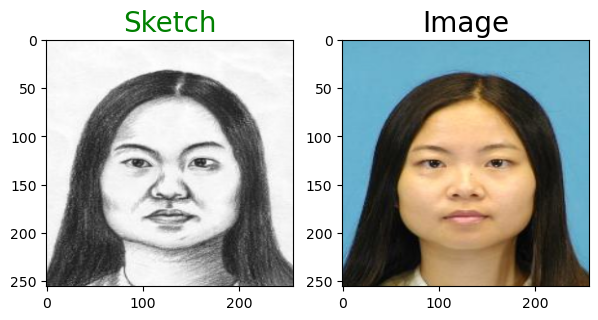

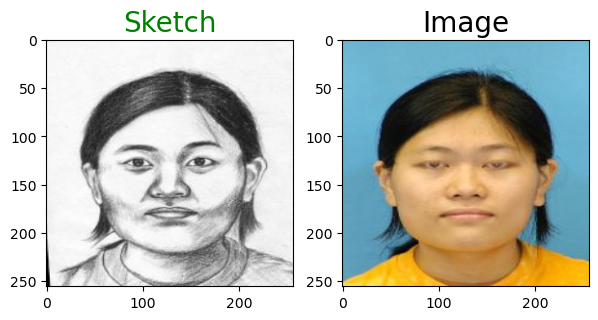

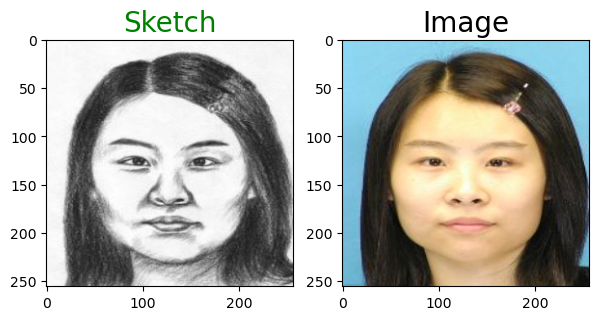

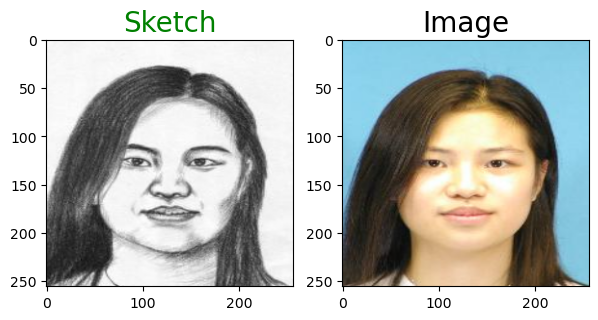

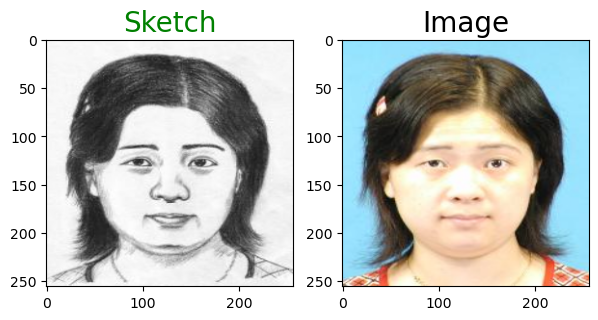

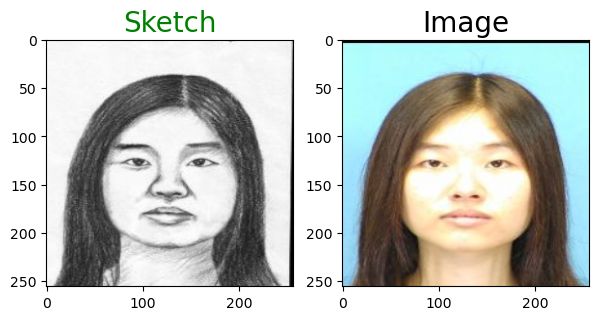

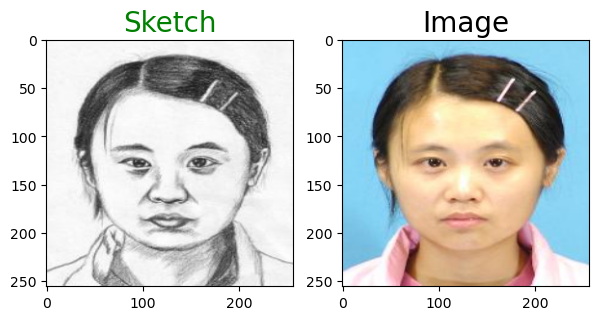

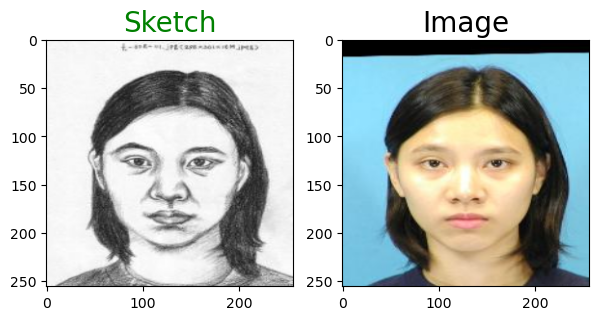

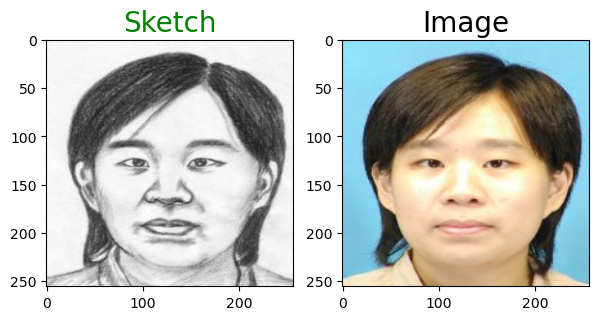

In [ ]:
ls = [i for i in range(0,65,8)]
for i in ls:
    plot_images(img_array[i],sketch_array[i])

In [ ]:
train_sketch_image = sketch_array[:1200]
train_image = img_array[:1200]
test_sketch_image = sketch_array[1200:]
test_image = img_array[1200:]
# reshaping
train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)

Train color image shape: (1200, 256, 256, 3)
Test color image shape (8952, 256, 256, 3)


In [ ]:
def downsample(filters, size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(keras.layers.Conv2D(filters = filters, kernel_size = size, strides = 2, use_bias = False, kernel_initializer = 'he_normal'))
    if apply_batch_normalization:
        downsample.add(keras.layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample

In [ ]:
def upsample(filters, size, apply_dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(keras.layers.Conv2DTranspose(filters = filters, kernel_size = size, strides = 2, use_bias = False, kernel_initializer = 'he_normal'))
    if apply_dropout:
        upsample.add(tf.keras.layers.Dropout(0.1))
    upsample.add(tf.keras.layers.LeakyReLU())
    return upsample

In [ ]:
def model():
    encoder_input = keras.Input(shape = (SIZE, SIZE, 3))
    x = downsample(16, 4, False)(encoder_input)
    x = downsample(32,4)(x)
    x = downsample(64,4,False)(x)
    x = downsample(128,4)(x)
    x = downsample(256,4)(x)

    encoder_output = downsample(512,4)(x)

    decoder_input = upsample(512,4,True)(encoder_output)
    x = upsample(256,4,False)(decoder_input)
    x = upsample(128,4, True)(x)
    x = upsample(64,4)(x)
    x = upsample(32,4)(x)
    x = upsample(16,4)(x)
    x = tf.keras.layers.Conv2DTranspose(8,(2,2),strides = (1,1), padding = 'valid')(x)
    decoder_output = tf.keras.layers.Conv2DTranspose(3,(2,2),strides = (1,1), padding = 'valid')(x)


    return tf.keras.Model(encoder_input, decoder_output)
def ssim(y_true, y_pred):
    return tf.image.ssim(y_true, y_pred, max_val = 1)

In [ ]:
# to get summary of model
model = model()
model.summary()

Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)          │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_25 (Sequential)           │ (None, 127, 127, 16)        │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_26 (Sequential)           │ (None, 62, 62, 32)          │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_27 (Sequential)           │ (None, 30, 30, 64)          │          32,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_28 (Sequential)           │ (None, 14, 14, 128)         │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_29 (Sequential)           │ (None, 6, 6, 256)           │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_30 (Sequential)           │ (None, 2, 2, 512)           │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_31 (Sequential)           │ (None, 6, 6, 512)           │       4,194,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_32 (Sequential)           │ (None, 14, 14, 256)         │       2,097,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_33 (Sequential)           │ (None, 30, 30, 128)         │         524,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_34 (Sequential)           │ (None, 62, 62, 64)          │         131,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_35 (Sequential)           │ (None, 126, 126, 32)        │          32,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_36 (Sequential)           │ (None, 254, 254, 16)        │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_22                  │ (None, 255, 255, 8)         │             520 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_23                  │ (None, 256, 256, 3)         │              99 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,786,347 (37.33 MB)

 Trainable params: 9,784,491 (37.32 MB)

 Non-trainable params: 1,856 (7.25 KB)

In [ ]:
from wandb.keras import WandbCallback

In [ ]:
import tensorflow as tf

def custom_ssim(y_true, y_pred):
    ssim_value = tf.image.ssim(y_true, y_pred, max_val=1.0)
    return ssim_value


In [ ]:
# Define the model architecture using the function named model
def define_model():
    encoder_input = keras.Input(shape=(SIZE, SIZE, 3))
    x = downsample(16, 4, False)(encoder_input)
    x = downsample(32, 4)(x)
    x = downsample(64, 4, False)(x)
    x = downsample(128, 4)(x)
    x = downsample(256, 4)(x)

    encoder_output = downsample(512, 4)(x)

    decoder_input = upsample(512, 4, True)(encoder_output)
    x = upsample(256, 4, False)(decoder_input)
    x = upsample(128, 4, True)(x)
    x = upsample(64, 4)(x)
    x = upsample(32, 4)(x)
    x = upsample(16, 4)(x)
    x = tf.keras.layers.Conv2DTranspose(8, (2, 2), strides=(1, 1), padding='valid')(x)
    decoder_output = tf.keras.layers.Conv2DTranspose(3, (2, 2), strides=(1, 1), padding='valid')(x)

    return tf.keras.Model(encoder_input, decoder_output)

# Create the model instance
autoencoder_model = define_model()

# Compile the model
autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for multiple epochs
batch_size = 32
epochs = 500  # Set the number of epochs here

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    # Shuffle the training data
    combined_data = list(zip(train_sketch_image, train_image))
    np.random.shuffle(combined_data)
    train_sketch_image_shuffled, train_image_shuffled = zip(*combined_data)

    # Convert to numpy arrays
    train_sketch_image_shuffled = np.array(train_sketch_image_shuffled)
    train_image_shuffled = np.array(train_image_shuffled)

    # Train the model
    history = autoencoder_model.fit(train_sketch_image_shuffled, train_image_shuffled,
                                     batch_size=batch_size,
                                     epochs=1,  # Train for one epoch at a time
                                     validation_data=(test_sketch_image, test_image))

# Evaluate the model on the test data
loss = autoencoder_model.evaluate(test_sketch_image, test_image)
print("Test Loss:", loss)


Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 991ms/step - loss: 0.1656 - val_loss: 94.9845
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - loss: 0.0475 - val_loss: 21.6093
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - loss: 0.0378 - val_loss: 6.1983
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - loss: 0.0324 - val_loss: 5.0377
Epoch 5/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - loss: 0.0271 - val_loss: 0.6761
Epoch 6/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - loss: 0.0286 - val_loss: 0.8061
Epoch 7/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - loss: 0.0235 - val_loss: 0.0434
Epoch 8/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - loss: 0.0222 - val_loss: 0.3548
Epoch 9/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 995ms/step - loss: 0.0227 - val_loss: 0.0340
Epoch 10/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - loss: 0.0211 - val_loss: 0.0731
Epoch 11/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 0.0195 - val_loss: 0.0715
Epoch 12/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - l

In [ ]:
prediction_on_test_data = autoencoder_model.evaluate(test_sketch_image, test_image)
print("Loss: ", prediction_on_test_data)
print("Accuracy: ", np.round(prediction_on_test_data * 100,1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - loss: 0.0644
Loss:  0.062294527888298035
Accuracy:  6.2


In [ ]:
def show_images(sketch, image, predicted):
    plt.figure(figsize = (12,12))
    plt.subplot(1,3,1)
    plt.title("Sketch",fontsize = 15, color = 'Lime')
    plt.imshow(sketch)
    plt.subplot(1,3,2)
    plt.title("Image",fontsize = 15, color = 'Blue')
    plt.imshow(image)
    plt.subplot(1,3,3)
    plt.title("Predicted",fontsize = 15, color = 'gold')
    plt.imshow(predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


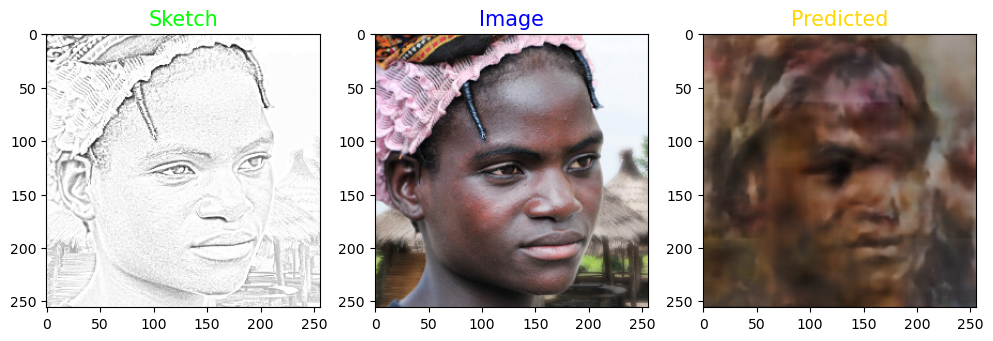

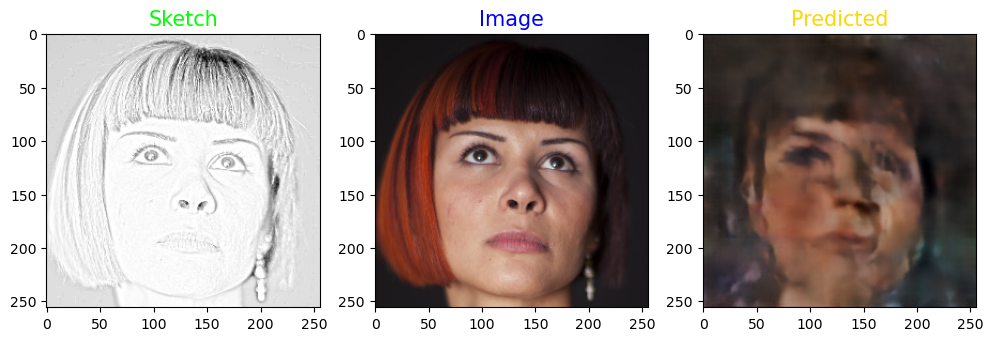

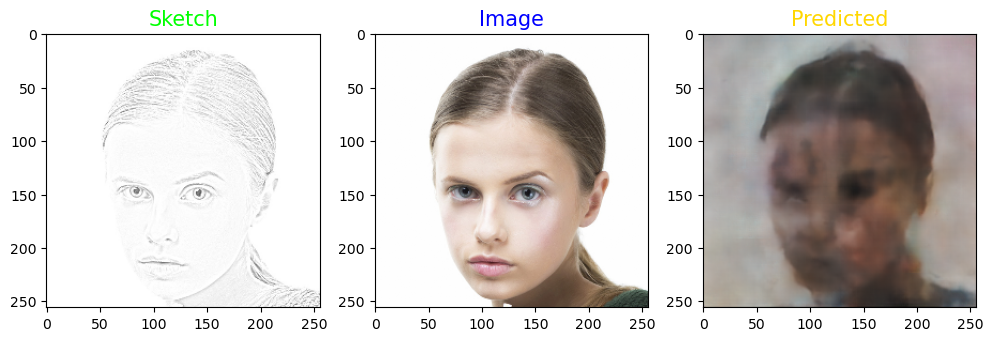

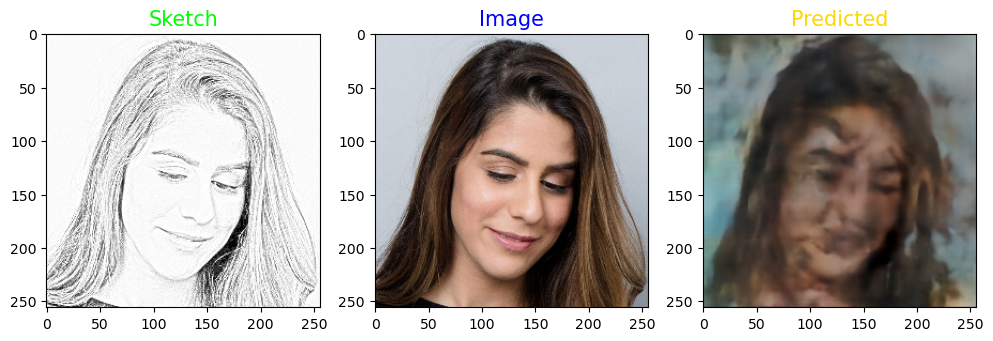

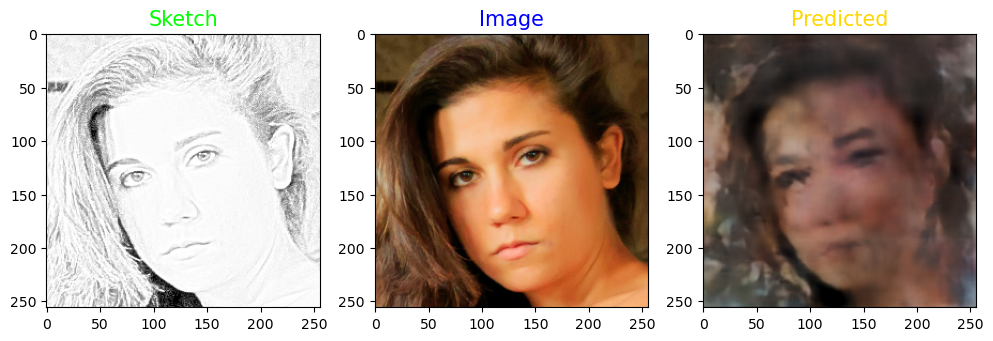

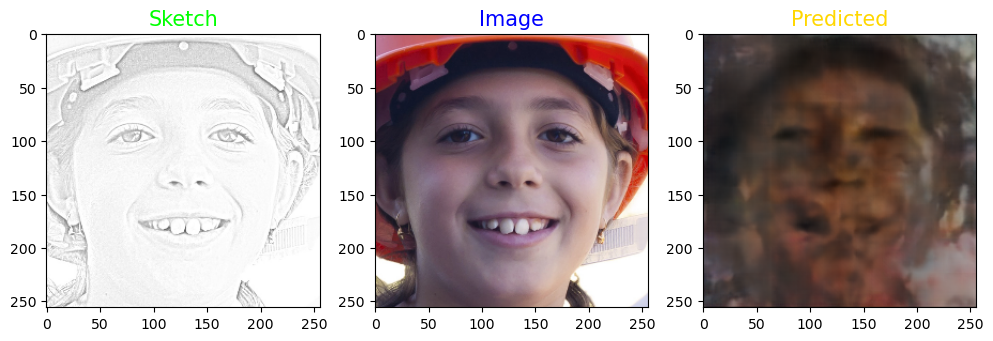

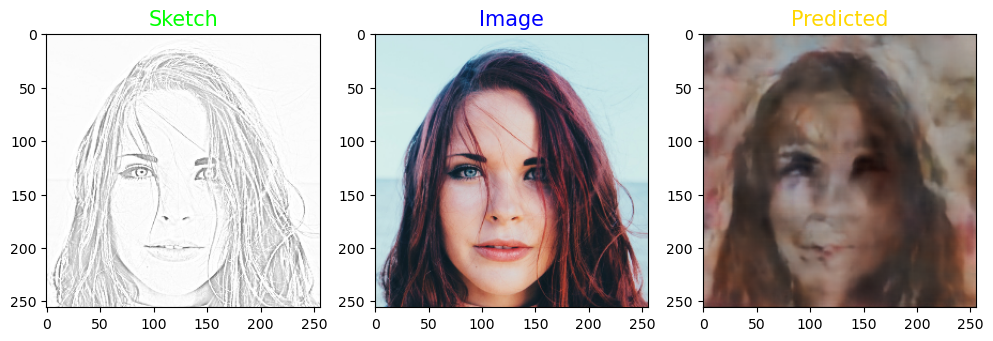

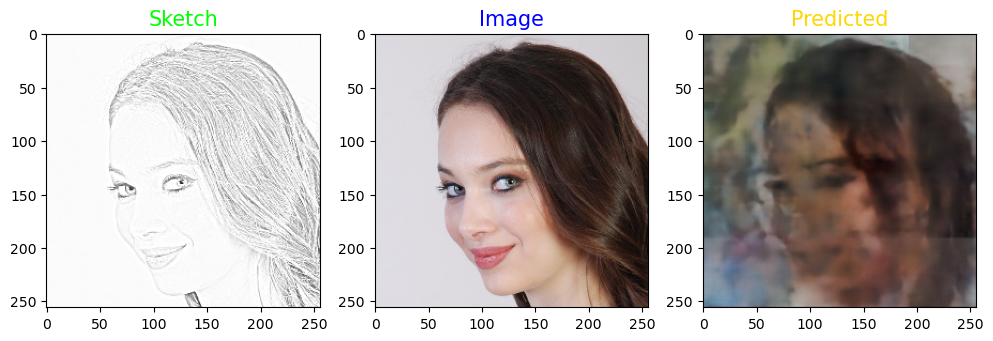

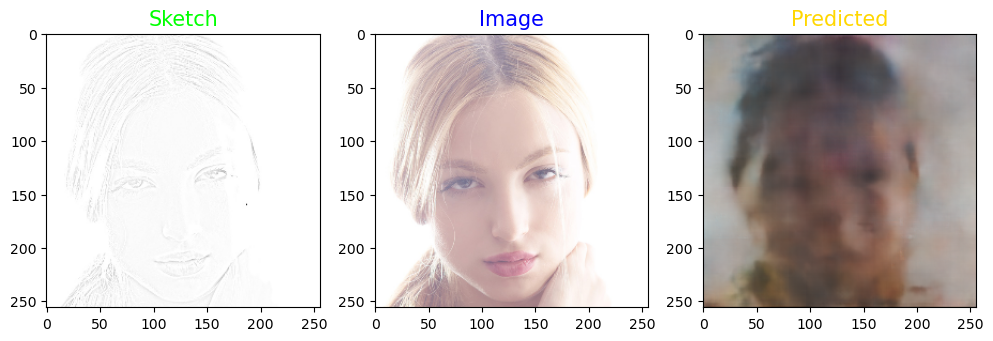

In [ ]:
ls = [i for i in range(len(test_sketch_image)) if i % 8 == 0]
for i in ls:
    predicted = np.clip(autoencoder_model.predict(test_sketch_image[i].reshape(1, SIZE, SIZE, 3)), 0.0, 1.0).reshape(SIZE, SIZE, 3)
    show_images(test_sketch_image[i], test_image[i], predicted)


new try below epoch 10-2.8
 epoch 100-15.2
 epoch 500-6.2
